# Sentiment Analysis and Topic Modeling on Amazon Electronic Product

## Introduction

In our increasingly digital society, e-commerce has become a vital aspect of our daily lives. The convenience, accessibility, and vast product options offered by online platforms have transformed the way we shop and conduct business. Within this context, customer reviews and ratings play a pivotal role in shaping consumer behavior and brand reputation. Thus in this project, we will utilize the data from Amazon produts to explore the relationship between rating and customer reviews. Based on the results, we will further look into what are the major topics of customer reviews.

## Research Questions

#### 1. What is the relationship between Amazon electronic product reviews and rating? Will the rating increase as 

#### the product reviews appear to be positive or vice versa? 




#### 2. What are the most mentioned topics in the review?




## Dataset Description

This dataset appears to be about various aspects of products available on Amazon. It includes information such as the product ID, product name, category, discounted price, actual price, discount percentage, rating, rating count, a description of the product, user IDs, user names, review IDs, review titles, review content, image links, and product links.
It covers a wide range of electronic product, including televisions, computers and phones, and more. Each product has associated ratings, reviews, and user information.


In [34]:
!pip install nltk
import nltk
!pip install emoji
import emoji
import pandas as pd
import re

In [35]:
csv_file = "amazon.csv"
df = pd.read_csv(csv_file)
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199.00,₹999.00,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


## Preprocessing

The preprocessing steps included removing URL links, mentions, stopwords, extra spaces and special characters,  and hashtags, as they do not contribute to the analysis of the reviews. Tokenization was performed to break the text into individual tokens, and lemmatization was applied to reduce words to their base form. These preprocessing steps were relevant to our research questions of exploring the relationship between Amazon electronic product reviews and ratings, as well as identifying the prominent topics discussed in the reviews. By cleaning and structuring the text data, we were able to extract meaningful insights from the dataset. 

In [36]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
def clean_text(text):
    if pd.isna(text):
        return text
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = re.sub(r'\W', ' ', text)  # remove special characters
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return text.strip()
# Apply clean_text function to the column
df['cleaned_text'] = df['review_content'].apply(clean_text)
df['cleaned_text']

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       looks durable charging is fine toono complains...
1       i ordered this cable to connect my phone to an...
2       not quite durable and sturdy  good  nice produ...
3       good product long wire charges good nice i bou...
4       bought this instead of original apple  does th...
                              ...                        
1460    i received product without spanner excellent p...
1461    ok got everything as mentioned but the measuri...
1462    plastic but cool body  u have to find sturdy s...
1463    i have installed this in my kitchen working fi...
1464    it does it job perfectly  only issue is temp c...
Name: cleaned_text, Length: 1465, dtype: object

## Analysis

In analysis, we first applied sentiment analysis to analyze the content of product reviews are positive or negative to explore the first research question. Then we applied topic modeling to discover what are some most mentioned topics in the product reviews, and based on the result of sentiment analysis to further analyze. 

### Sentiment Analysis

In [41]:
!pip install nltk 
!pip install -U textblob
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# Define a function for sentiment analysis using TextBlob
def get_sentiment_textblob(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"
# get continuous textblob sentiment scores
def get_sent_textblob_cont(text):
    return TextBlob(text).sentiment.polarity
    
# get continuous textblob sentiment scores
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis functions
df['sentiment_textblob'] = df['cleaned_text'].apply(get_sentiment_textblob)
df['sent_textblob_cont'] = df['cleaned_text'].apply(get_sent_textblob_cont)
df["get_sentiment"] = df['cleaned_text'].apply(get_sentiment)

In [42]:
df["get_sentiment"]

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1460    positive
1461    positive
1462    positive
1463    positive
1464    positive
Name: get_sentiment, Length: 1465, dtype: object

In [9]:
# Count the sentiment label occurrences for TextBlob
textblob_sentiment_counts = df['sentiment_textblob'].value_counts()
# Print the distribution of sentiment labels for TextBlob
print("TextBlob Sentiment Distribution:")
print(textblob_sentiment_counts)

TextBlob Sentiment Distribution:
Positive    1457
Negative       8
Name: sentiment_textblob, dtype: int64


In [10]:
# Calculate the summary statistics of continuous sentiment scores for TextBlob
textblob_sentiment_summary = df['sent_textblob_cont'].describe()
# Print the summary statistics of continuous sentiment scores for TextBlob
print("TextBlob Sentiment Summary:")
print(textblob_sentiment_summary)

TextBlob Sentiment Summary:
count    1465.000000
mean        0.307371
std         0.131019
min        -0.600000
25%         0.216495
50%         0.297222
75%         0.391415
max         0.836667
Name: sent_textblob_cont, dtype: float64


### Topic Modeling 

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import re
import nltk
from nltk.corpus import stopwords
# Make sure you have the stop words package downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
documents = df['cleaned_text']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(documents)
number_topics = 6
number_words = 5

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=42)
lda.fit(count_data)
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, count_vectorizer, number_words)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Topic #1:
tv good quality sound remote

Topic #2:
product good use easy quality

Topic #3:
use product good easy power

Topic #4:
good watch phone battery camera

Topic #5:
good cable product quality charging

Topic #6:
good product use water quality


## Visualization

#### Sentiment Analysis: Distribution of Sentiment Scores of Product Reviews

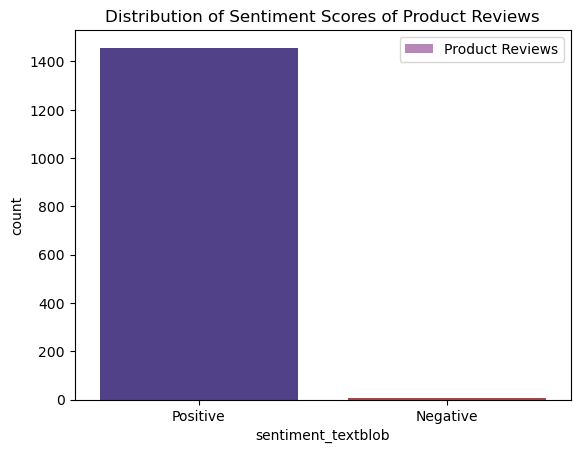

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a count plot
sns.countplot(data=df, x='get_sentiment')
sns.countplot(x="sentiment_textblob", data=df, label="Product Reviews", color='purple', alpha=0.5)
plt.legend()
plt.title('Distribution of Sentiment Scores of Product Reviews')
plt.show()

#### Sentiment Analysis: Sentiment Scores of Product Reviews vs. Rating (Scatterplot)

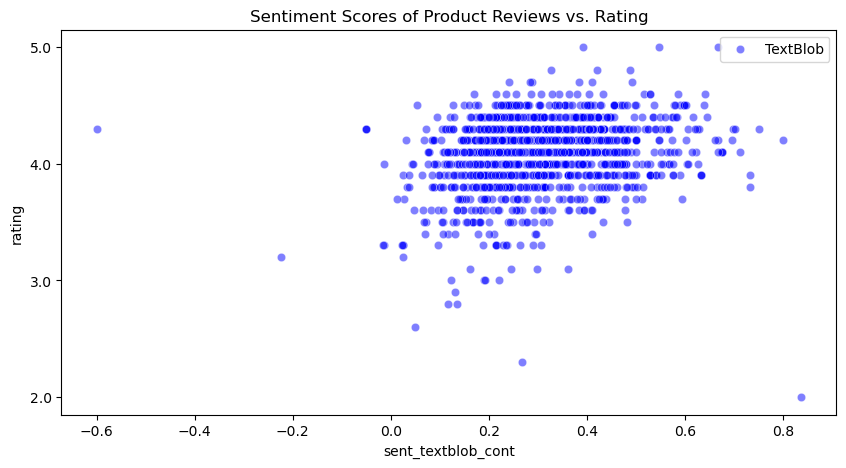

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
# Convert 'rating' column to numeric data type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
plt.figure(figsize=(10, 5))
sns.scatterplot(x="sent_textblob_cont", y="rating", data=df, label="TextBlob", color='blue', alpha=0.5)
# Specify the tick positions for the y-axis
tick_positions = range(int(min(df['rating'].dropna())), int(max(df['rating'].dropna()))+1)
plt.yticks(tick_positions)
# Format y-axis tick labels with one decimal point
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.legend()
plt.title('Sentiment Scores of Product Reviews vs. Rating')
plt.show()

#### Topic Modeling: Topic Clusters

In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.manifold import TSNE

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda.transform(count_data)):
    topic_weights.append([w for i, w in enumerate(row_list)])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)
!pip install bokeh

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1448 samples in 0.001s...
[t-SNE] Computed neighbors for 1448 samples in 0.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1448
[t-SNE] Computed conditional probabilities for sample 1448 / 1448
[t-SNE] Mean sigma: 0.002273
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.884144
[t-SNE] KL divergence after 1000 iterations: 0.375950
  Using cached bokeh-3.1.1-py3-none-any.whl (8.3 MB)
  Using cached xyzservices-2023.5.0-py3-none-any.whl (56 kB)


In [29]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
# Plot the Topic Clusters using Bokeh
output_notebook()
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(number_topics), 
              width=900, height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)
plt.show()

Loading BokehJS ...

## Results

##### Sentiment Analysis(RQ1):
The result suggest that customers generally have a positive attitude toward the Amazon products they purchased since the majority of the reviews are classified as positive. This indicates that most of the customers are satisfied with the products, even though very few negative sentiments still exist.
        
The summary statistics of the continuous sentiment scores provide a more detailed understanding of the sentiment distribution. The range of scores suggests that there is variation in the sentiment expressed by customers, with some reviews being highly positive and others being less positive.

Based on that, the sentiment analysis results combined with the context of customer reviews of Amazon products indicate a predominantly positive sentiment towards the products. Nevertheless, we can see that there is slightly posivtive relationship between sentiment of customer reviews and rating. But the relationship does not appear as what we have anticipated since we expect the rating increases as the sentiment to be more positive, and if we examin the scatterplot, we can see that some fairly low ratings still have relatively positive sentiment and most points are clustering on the right side, which indicates high sentiment scores. 

Therefore, we can conclude that, based on the result we generated that most customer reviews of Amazon products are positive despite of the rating, and the linear relationship between the two variables are slightly positive. 

##### Topic Modeling(RQ2): 
The result obtained from the topic modeling analysis using LDA can provide insights into the underlying topics present in the customer reviews of Amazon products, and we genertaed 6 topics with 5 words that describe each topic. Here are some observations based on the generated topics:

Topic #1 (tv good quality sound remote) : This topic seems to be related to the features of televisions, mentioning words like "remote" and "quality." We can speculate that the content of customer reviews are focusing on complimenting the features of televisions combining with the ovrall high sentiment scores from sentiment analysis. 

Topic #2 (product good use easy quality) : This topic is associated with general product functions such as "good," "easy," and "use." It indicates that customers discuss the overall quality and usability of the products they purchased, and the exact content is highly possible to be positive.

Topic #3 (use product good easy power) : This topic appears to be discussing similar aspects like  Topic #2, since there are repetitive words appearing in the two topics, and we can infer similar information from these two topics.
     
Topic #4 (good watch phone battery camera) : This topic is related to specific products, possibly watches,phones,and cameras, as they are mentioned. Customers seem to discuss the positive attributes of these products, particularly its battery feature.
     
Topic #5 (good cable product quality charging) : This topic is related to the charging feature of products, as it mentions "cable," and "charging." It indicates that customers discuss and compliment the charging feature.

Topic #6 (good product use water quality) : This topic could be associated with a specific product that is easy to use in water and waterproof, as it mentions "water" and "easy." It implies that customers discuss the convenience and usability of the product in water environments.

Overall, these results provide an understanding of the key topics present in the customer reviews of Amazon products. We can see the most content of product reviews are related to a specific feature of the product. We can also further analyze that these content are expressing satisfaction and complimenting the mentioned feature since the previous sentiment analysis has illustrated the fact that the majority of the reviews are positive. 
        

## Contribution

##### - Cisco Yang: Major coding and revision

##### - Zhukang Qin: Writing of Research questions, data description, and preprocessing

##### - Ashley Wang: Writing of Analysis and Results

##### - Wenbo Wei: Writing of Introduction

##### The overall project is discussed and operated with all members